# Lower Back Pain Prediction with Deep Learning

## Lower Back Pain Symptoms Dataset

### About Dataset

310 Observations, 13 Attributes (12 Numeric Predictors, 1 Binary Class Attribute - No Demographics)

Lower back pain can be caused by a variety of problems with any parts of the complex, interconnected network of spinal muscles, nerves, bones, discs or tendons in the lumbar spine. Typical sources of low back pain include:

* The large nerve roots in the low back that go to the legs may be irritated
* The smaller nerves that supply the low back may be irritated
* The large paired lower back muscles (erector spinae) may be strained
* The bones, ligaments or joints may be damaged
* An intervertebral disc may be degenerating

An irritation or problem with any of these structures can cause lower back pain and/or pain that radiates or is referred to other parts of the body. Many lower back problems also cause back muscle spasms, which don't sound like much but can cause severe pain and disability.

While lower back pain is extremely common, the symptoms and severity of lower back pain vary greatly. A simple lower back muscle strain might be excruciating enough to necessitate an emergency room visit, while a degenerating disc might cause only mild, intermittent discomfort.

This data set is about to identify a person is abnormal or normal using collected physical spine details/data.

Information about features:

* Col1 - pelvic incidence
* Col2 - pelvic tilt
* Col3 - lumbar lordosis angle
* Col4 - sacral slope
* Col5 - pelvic radius
* Col6 - degree spondylolisthesis
* Col7 - pelvic slope
* Col8 - direct tilt
* Col9 - thoracic slope
* Col10 - cervical tilt
* Col11 - sacrum angle
* Col12 - scoliosis slope


---

#### Activity 1.        

* Import the `Dataset_spine.csv` dataset with Pandas

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import diabetes dataset
df_spine = pd.read_csv("Dataset_spine.csv")

# view first lines of the dataset
df_spine.head()

#df_diabetes.info()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


---

#### Activity 2.        

* Plot the distribution of classes in the dataset.

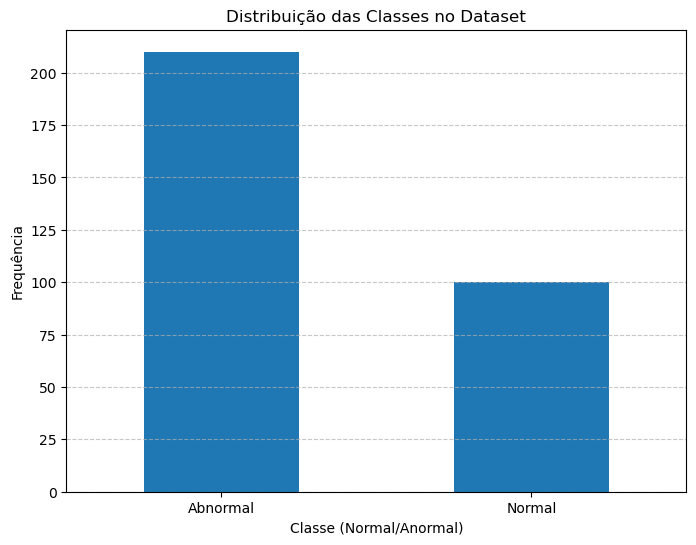

In [8]:
# Plotar a distribuição das classes
class_distribution = df_spine['Class_att'].value_counts()

# Criar o gráfico
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar')
plt.title('Distribuição das Classes no Dataset')
plt.xlabel('Classe (Normal/Anormal)')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---

#### Activity 3.        

* Split the data into training and test sets. Make sure that the test set corresponds to 1/10th of your data.

In [22]:
from sklearn.model_selection import train_test_split

# Separar as características (X) e a classe alvo (y)
X = df_spine.drop(columns=['Class_att', 'Unnamed: 13'], errors='ignore')  # Substitua 'Class_att' pelo nome correto da coluna da classe, se necessário
y = df_spine['Class_att']  # Substitua 'Class_att' pelo nome correto da coluna da classe, se necessário

# Dividir os dados em conjuntos de treino e teste (test_size=1/10 corresponde a 10% dos dados)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Verificar os tamanhos dos conjuntos
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (279, 12)
Tamanho do conjunto de teste: (31, 12)


---

#### Activity 4.
    
* Train a multi-layer perceptron with three hidden layers where each hidden layer has 128 neurons. Use the `MLPClassifier` from `sklearn.neural_network`.

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Escalar os dados para normalização (MLPClassifier é sensível à escala dos dados)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o perceptron multicamadas
mlp = MLPClassifier(hidden_layer_sizes=(128, 128, 128), max_iter=500, random_state=42)

# Ajustar o modelo aos dados de treino
mlp.fit(X_train_scaled, y_train)

# Fazer previsões nos dados de teste
y_pred = mlp.predict(X_test_scaled)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia no conjunto de teste: 0.87

Relatório de Classificação:
              precision    recall  f1-score   support

    Abnormal       0.90      0.90      0.90        21
      Normal       0.80      0.80      0.80        10

    accuracy                           0.87        31
   macro avg       0.85      0.85      0.85        31
weighted avg       0.87      0.87      0.87        31



---

#### Activity 5.        

* Plot the loss function while training the neural network. You can obtain the values of the loss function with attribute `MLPClassifier.loss_curve_`

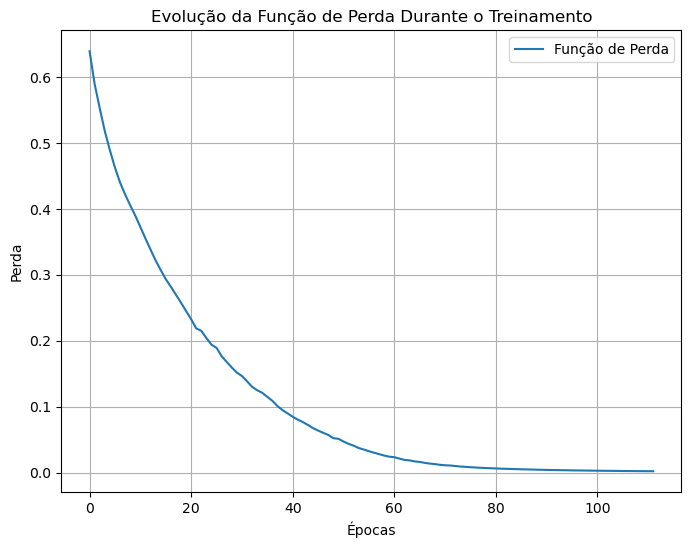

In [33]:
# Verificar se o modelo foi treinado (o atributo loss_curve_ está disponível após o treinamento) (opcional)

# Plotar a curva de perda
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_, label='Função de Perda')
plt.title('Evolução da Função de Perda Durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.grid(True)
plt.legend()
plt.show()

---

#### Activity 6.

* Calculate the accuracy, confusion matrix, precision, recall, and f1 score with the test set

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular precisão, recall e F1-score
precision = precision_score(y_test, y_pred, average='binary', pos_label='Abnormal')  # Ajuste o rótulo conforme necessário
recall = recall_score(y_test, y_pred, average='binary', pos_label='Abnormal')
f1 = f1_score(y_test, y_pred, average='binary', pos_label='Abnormal')

# Exibir os resultados
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nMatriz de Confusão:")
print(conf_matrix)


Acurácia: 0.87
Precisão: 0.90
Recall: 0.90
F1-score: 0.90

Matriz de Confusão:
[[19  2]
 [ 2  8]]


---

#### Activity 7.

* Standardize the training and test sets using `StandardScaler` from `sklearn.preprocessing` 

In [39]:
from sklearn.preprocessing import StandardScaler

# Criar o objeto StandardScaler
scaler = StandardScaler()

# Ajustar o StandardScaler ao conjunto de treino e transformá-lo
X_train_scaled = scaler.fit_transform(X_train)

# Transformar o conjunto de teste com o mesmo scaler
X_test_scaled = scaler.transform(X_test)

# Exibir os primeiros valores padronizados do conjunto de treino como exemplo
print("Conjunto de treino padronizado (primeiros 5 exemplos):")
print(X_train_scaled[:5])

print("\nConjunto de teste padronizado (primeiros 5 exemplos):")
print(X_test_scaled[:5])


Conjunto de treino padronizado (primeiros 5 exemplos):
[[-0.81060634 -0.66075986 -1.06965726 -0.56115821 -1.41699968 -0.51332735
  -1.40132305 -0.77767082 -1.63397575 -1.59190991 -0.84267549  0.25252227]
 [-0.1741096   1.60538584 -0.06441354 -1.4058985   1.76246957  3.1905894
   0.4575039   0.06347822 -1.59993426 -1.41291965 -1.10968632 -0.7364251 ]
 [ 1.13587033 -0.06636606  0.77231171  1.5162633  -0.08633639  0.82378594
  -1.29335819  0.65981891  1.57115923  0.0251077  -0.91311617 -0.38625842]
 [-0.7839894  -0.23174439 -0.75569055 -0.8423667  -0.10050322 -0.63623353
  -1.20380247  1.06303942  0.48712557 -1.08968462  1.54448845 -0.83633362]
 [-0.8194036  -0.76280824 -0.80923699 -0.49745399  0.78934866 -0.81217822
   1.3765675  -1.31737658  0.65085597  1.59698251 -0.68121915  1.39513173]]

Conjunto de teste padronizado (primeiros 5 exemplos):
[[ 0.25422506 -0.78535195  0.30109335  0.90616176 -1.72103347  0.61345924
  -1.09725279 -0.76432601 -1.20486368 -0.3642346   1.73078941  0.907941

---

#### Activity 8.
    
* With the standadized training set in Activity 7, train a multi-layer perceptron with three hidden layers where each hidden layer has 128 neurons

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Criar e configurar o modelo MLPClassifier
mlp_standardized = MLPClassifier(hidden_layer_sizes=(128, 128, 128), max_iter=500, random_state=42)

# Treinar o modelo com o conjunto de treino padronizado
mlp_standardized.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste padronizado
y_pred_standardized = mlp_standardized.predict(X_test_scaled)

# Avaliar o modelo no conjunto de teste padronizado

accuracy_standardized = accuracy_score(y_test, y_pred_standardized)
print(f"Acurácia no conjunto de teste (dados padronizados): {accuracy_standardized:.2f}")

print("\nRelatório de Classificação (dados padronizados):")
print(classification_report(y_test, y_pred_standardized))


Acurácia no conjunto de teste (dados padronizados): 0.87

Relatório de Classificação (dados padronizados):
              precision    recall  f1-score   support

    Abnormal       0.90      0.90      0.90        21
      Normal       0.80      0.80      0.80        10

    accuracy                           0.87        31
   macro avg       0.85      0.85      0.85        31
weighted avg       0.87      0.87      0.87        31



---

#### Activity 9.        

* Plot the loss function while training the neural network.

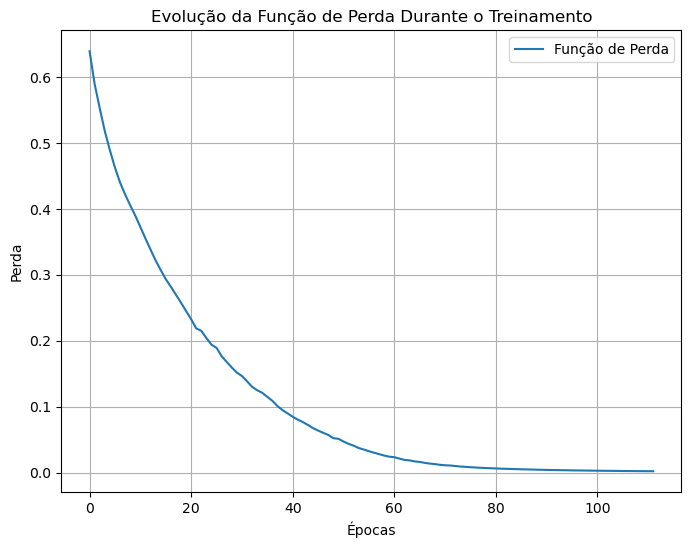

In [52]:
# Verificar se o modelo treinado tem o atributo loss_curve_

# Plotar a função de perda
plt.figure(figsize=(8, 6))
plt.plot(mlp_standardized.loss_curve_, label='Função de Perda')
plt.title('Evolução da Função de Perda Durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.grid(True)
plt.legend()
plt.show()



---

#### Activity 10.

* Calculate the accuracy, confusion matrix, precision, recall, and f1 score with the standardized test set

In [57]:
# Calcular a acurácia
accuracy_standardized = accuracy_score(y_test, y_pred_standardized)

# Calcular a matriz de confusão
conf_matrix_standardized = confusion_matrix(y_test, y_pred_standardized)

# Calcular precisão, recall e F1-score
precision_standardized = precision_score(y_test, y_pred_standardized, average='binary', pos_label='Abnormal')  # Ajuste o rótulo conforme necessário
recall_standardized = recall_score(y_test, y_pred_standardized, average='binary', pos_label='Abnormal')
f1_standardized = f1_score(y_test, y_pred_standardized, average='binary', pos_label='Abnormal')

# Exibir os resultados
print(f"Acurácia (padronizado): {accuracy_standardized:.2f}")
print(f"Precisão (padronizado): {precision_standardized:.2f}")
print(f"Recall (padronizado): {recall_standardized:.2f}")
print(f"F1-score (padronizado): {f1_standardized:.2f}")

print("\nMatriz de Confusão (padronizado):")
print(conf_matrix_standardized)


Acurácia (padronizado): 0.87
Precisão (padronizado): 0.90
Recall (padronizado): 0.90
F1-score (padronizado): 0.90

Matriz de Confusão (padronizado):
[[19  2]
 [ 2  8]]


---

#### Activity 11.

Perform a hyperparameter tuning procedure with the following configurations:

* number of layers = 1, 2, 3, 4
* number of neurons in each layer = 32, 64, 128

Print the test set accuracy for each configuration

In [70]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score

# Definir a grade de hiperparâmetros
param_grid = {
    'hidden_layers': [1, 2, 3, 4],  # Número de camadas
    'neurons_per_layer': [32, 64, 128]  # Número de neurônios por camada
}

# Inicializar variáveis para armazenar os resultados
results = []

# Gerar todas as combinações de hiperparâmetros
grid = ParameterGrid(param_grid)

# Iterar sobre cada configuração
for params in grid:
    layers = tuple([params['neurons_per_layer']] * params['hidden_layers'])
    print(f"Treinando com {params['hidden_layers']} camadas e {params['neurons_per_layer']} neurônios por camada...")

    # Configurar o MLPClassifier com os hiperparâmetros atuais
    mlp_tuned = MLPClassifier(hidden_layer_sizes=layers, max_iter=500, random_state=42)

    # Treinar o modelo
    mlp_tuned.fit(X_train_scaled, y_train)

    # Fazer previsões no conjunto de teste
    y_pred_tuned = mlp_tuned.predict(X_test_scaled)

    # Calcular a acurácia no conjunto de teste
    accuracy = accuracy_score(y_test, y_pred_tuned)
    results.append({
        'layers': params['hidden_layers'],
        'neurons_per_layer': params['neurons_per_layer'],
        'accuracy': accuracy
    })

    print(f"Acurácia: {accuracy:.2f}\n")

# Exibir os resultados em formato de tabela
results_df = pd.DataFrame(results)

# Ordenar os resultados pela acurácia em ordem decrescente
results_df = results_df.sort_values(by='accuracy', ascending=False)

# Mostrar os resultados diretamente
print("\nResultados da Otimização de Hiperparâmetros:")
print(results_df)


Treinando com 1 camadas e 32 neurônios por camada...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia: 0.94

Treinando com 1 camadas e 64 neurônios por camada...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia: 0.94

Treinando com 1 camadas e 128 neurônios por camada...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia: 0.90

Treinando com 2 camadas e 32 neurônios por camada...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia: 0.90

Treinando com 2 camadas e 64 neurônios por camada...
Acurácia: 0.94

Treinando com 2 camadas e 128 neurônios por camada...
Acurácia: 0.90

Treinando com 3 camadas e 32 neurônios por camada...
Acurácia: 0.84

Treinando com 3 camadas e 64 neurônios por camada...
Acurácia: 0.87

Treinando com 3 camadas e 128 neurônios por camada...
Acurácia: 0.87

Treinando com 4 camadas e 32 neurônios por camada...
Acurácia: 0.90

Treinando com 4 camadas e 64 neurônios por camada...
Acurácia: 0.90

Treinando com 4 camadas e 128 neurônios por camada...
Acurácia: 0.87


Resultados da Otimização de Hiperparâmetros:
    layers  neurons_per_layer  accuracy
0        1                 32  0.935484
1        1                 64  0.935484
4        2                 64  0.935484
2        1                128  0.903226
3        2                 32  0.903226
5        2                128  0.903226
9        4                 32  0.903226
10       4                 64  0.903226
7        3             

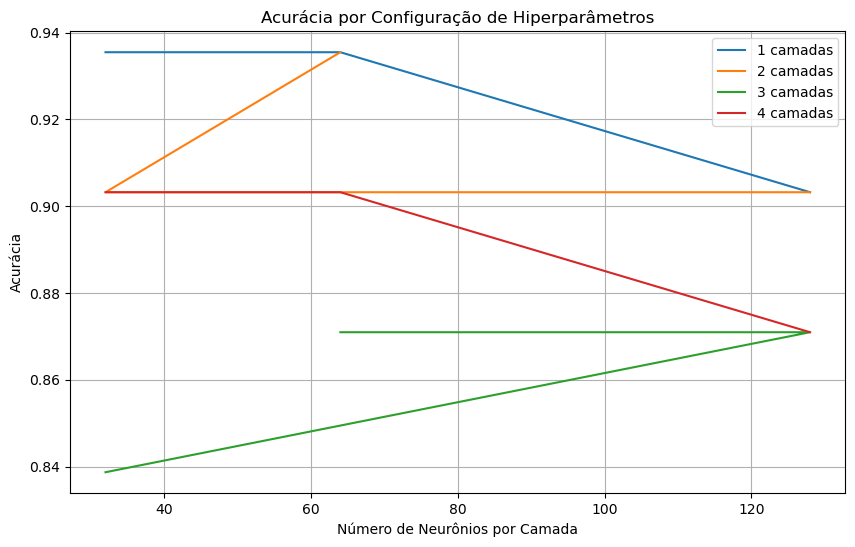

In [68]:
plt.figure(figsize=(10, 6))
for layer in param_grid['hidden_layers']:
    subset = results_df[results_df['layers'] == layer]
    plt.plot(subset['neurons_per_layer'], subset['accuracy'], label=f'{layer} camadas')
plt.title('Acurácia por Configuração de Hiperparâmetros')
plt.xlabel('Número de Neurônios por Camada')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()
